In [0]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt

## Plot

In [0]:
class Parse():
    def __init__(self, file_name, model_name):
        self.output_folder = '/content/drive/My Drive/kaggle/output'
        self.filepath = os.path.join(self.output_folder, file_name)
        self.model_name = model_name

        if file_name.split('.')[-1] == 'txt':
            self.parse_txt()
        else:
            result = np.load(self.filepath)
            self.train_loss = result[0]
            self.train_accuracy = result[1]
            self.val_loss = result[2]
            self.val_accuracy = result[3]

    def parse_txt(self):
        result = []
        with open(self.filepath, 'r') as f: 
            lines = f.readlines()
            for line in lines:
                line = line.replace('\n', '')
                if line not in ['train_loss', 'train_accuracy', 'val_loss', 'val_accuracy']:
                    if line != '':
                        result.append(float(line))

        n = len(result) // 4
        self.train_loss = result[:n]
        self.train_accuracy = result[n:2*n]
        self.val_loss = result[2*n:3*n]
        self.val_accuracy = result[3*n:]

    def plot_loss(self):
        plt.plot(self.train_loss, label=self.model_name + ' training loss')
        plt.plot(self.val_loss, label=self.model_name + ' val loss')
        plt.legend(frameon=False)
        plt.show()

    def plot_accuracy(self):
        plt.plot(self.train_accuracy, label=self.model_name + ' training accuracy')
        plt.plot(self.val_accuracy, label=self.model_name + ' val accuracy')
        plt.legend(frameon=False)
        plt.show()

    def set_titles(self, titles):
        self.titles = titles
    
    def plot_all(self):
        fig, ax = plt.subplots(1, 2, sharex=True, figsize=(17, 5))
        ax[0].plot(self.train_loss, label=self.model_name + ' training loss')
        ax[0].plot(self.val_loss, label=self.model_name + ' val loss')
        # ax[0].set_title(titles[0])
        ax[0].set_xlabel("Epochs")
        ax[0].set_ylabel("BCELoss")
        ax[0].legend(frameon=False)

        ax[1].plot(self.train_accuracy, label=self.model_name + ' training accuracy')
        ax[1].plot(self.val_accuracy, label=self.model_name + ' val accuracy')
        # ax[0].set_title(titles[1])
        ax[1].set_xlabel("Epochs")
        ax[1].set_ylabel("Accuracy (%)")
        ax[1].legend(frameon=False)

### LSTM

hidden_dim1=50, hidden_dim2=20, no max pooling, SGD, learning rate 0.0001

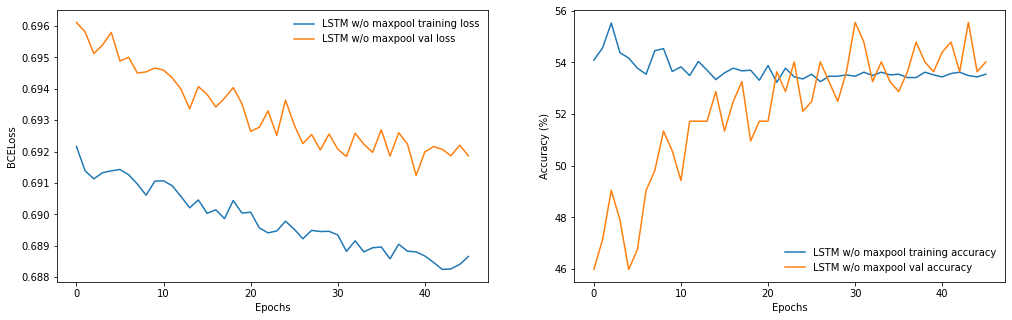

In [0]:
p1 = Parse('lstm_50_20_0.0001SGD_45ep_noMaxPool.npy', 'LSTM w/o maxpool')
p1.plot_all()

In [0]:
idx = p1.val_loss.argmin()
print(p1.val_loss[idx], p1.val_accuracy[idx])

0.6912394748336967 53.63984674329502


hidden_dim1=50, hidden_dim2=20, with max pooling, SGD, learning rate 0.0001

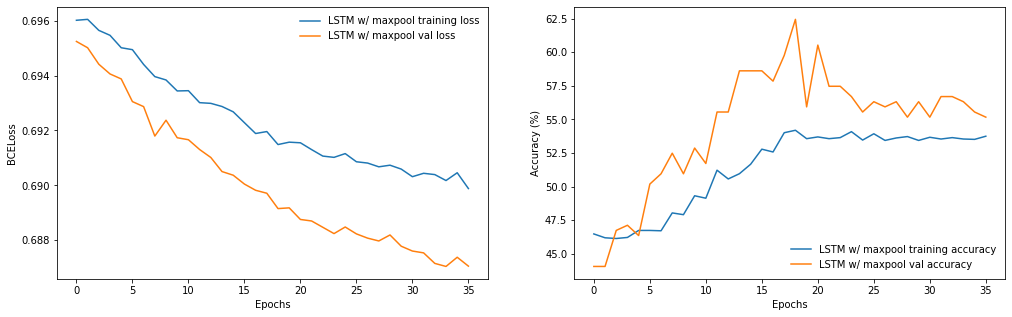

In [0]:
p2 = Parse('lstm_50_20_0.0001SGD_35ep.npy', 'LSTM w/ maxpool')
p2.plot_all()

In [0]:
idx = p2.val_loss.argmin()
print(p2.val_loss[idx], p2.val_accuracy[idx])

0.6870418115593921 56.32183908045977


Comparison

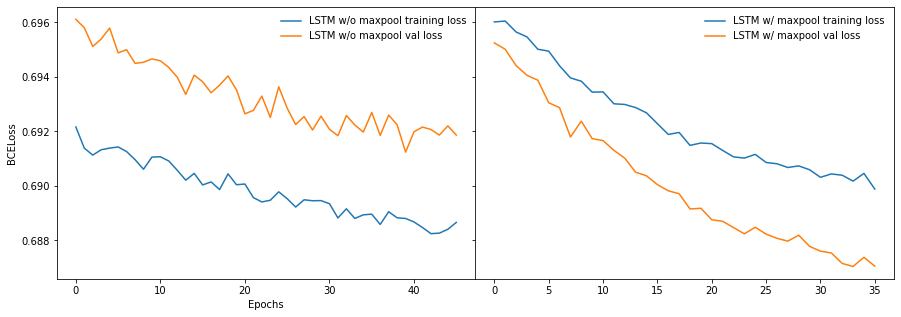

In [0]:
fig, ax = plt.subplots(1, 2, sharey=True, figsize=(15, 5), gridspec_kw={'hspace': 0, 'wspace': 0})
ax[0].plot(p1.train_loss, label=p1.model_name + ' training loss')
ax[0].plot(p1.val_loss, label=p1.model_name + ' val loss')
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("BCELoss")
ax[0].legend(frameon=False)

ax[1].plot(p2.train_loss, label=p2.model_name + ' training loss')
ax[1].plot(p2.val_loss, label=p2.model_name + ' val loss')
# ax[1].set_xlabel("Epochs")
# ax[1].set_ylabel("BCELoss")
ax[1].legend(frameon=False)

for a in ax.flat:
    a.label_outer()

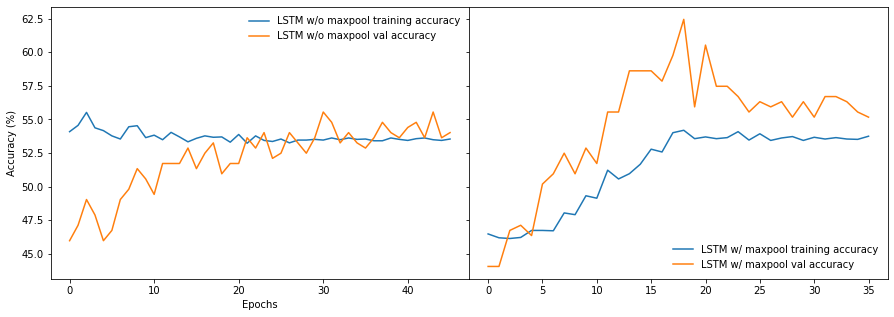

In [0]:
fig, ax = plt.subplots(1, 2, sharey=True, figsize=(15, 5), gridspec_kw={'hspace': 0, 'wspace': 0})
ax[0].plot(p1.train_accuracy, label=p1.model_name + ' training accuracy')
ax[0].plot(p1.val_accuracy, label=p1.model_name + ' val accuracy')
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy (%)")
ax[0].legend(frameon=False)

ax[1].plot(p2.train_accuracy, label=p2.model_name + ' training accuracy')
ax[1].plot(p2.val_accuracy, label=p2.model_name + ' val accuracy')
ax[1].legend(frameon=False)

for a in ax.flat:
    a.label_outer()

Comparison

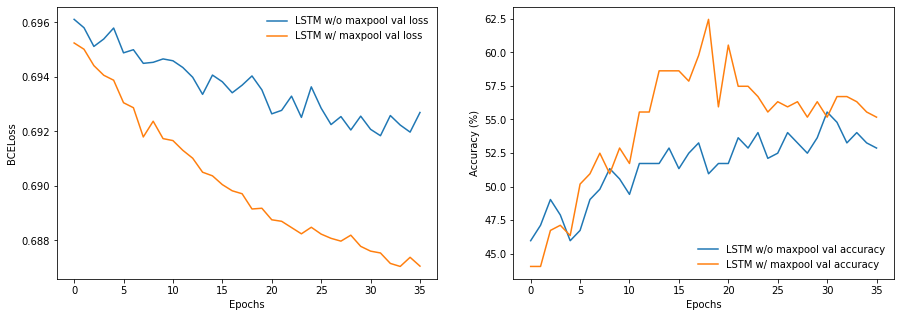

In [0]:
fig, ax = plt.subplots(1, 2, sharex=True, figsize=(15, 5))
ax[0].plot(p1.val_loss[:36], label=p1.model_name + ' val loss')
ax[0].plot(p2.val_loss, label=p2.model_name + ' val loss')
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("BCELoss")
ax[0].legend(frameon=False)

ax[1].plot(p1.val_accuracy[:36], label=p1.model_name + ' val accuracy')
ax[1].plot(p2.val_accuracy, label=p2.model_name + ' val accuracy')
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Accuracy (%)")
ax[1].legend(frameon=False)

### Attention

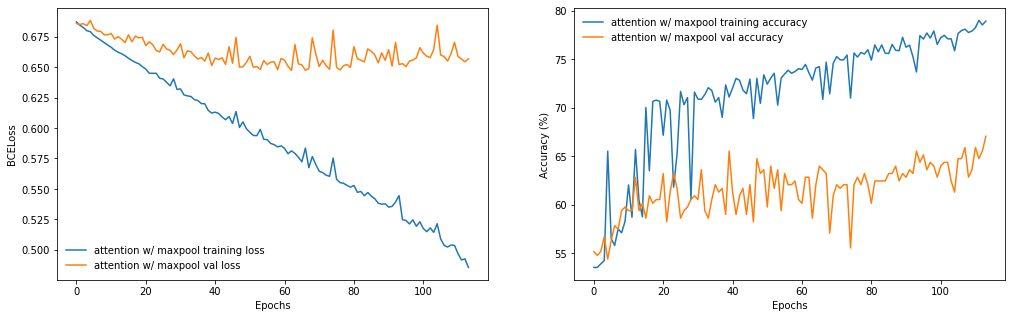

In [0]:
pa1 = Parse('attention_100_0.0001SGD.npy', 'attention w/ maxpool')
pa1.plot_all()

In [0]:
idx = pa1.val_loss.argmin()
print(pa1.val_loss[idx], pa1.val_accuracy[idx])

0.6473153742793876 62.83524904214559


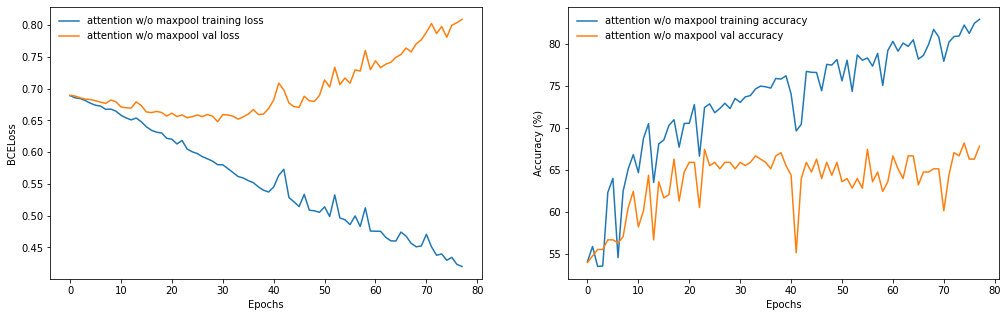

In [0]:
pa2 = Parse('attention_100_0.0001SGD_nomaxpool.npy', 'attention w/o maxpool')
pa2.plot_all()

In [0]:
idx = pa2.val_loss.argmin()
print(pa2.val_loss[idx], pa2.val_accuracy[idx])

0.6480083109318525 65.13409961685824


Comparison

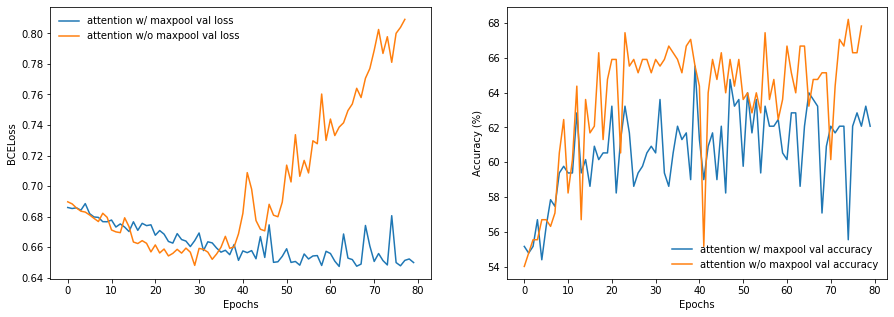

In [0]:
fig, ax = plt.subplots(1, 2, sharex=True, figsize=(15, 5))
ax[0].plot(pa1.val_loss[:80], label=pa1.model_name + ' val loss')
ax[0].plot(pa2.val_loss, label=pa2.model_name + ' val loss')
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("BCELoss")
ax[0].legend(frameon=False)

ax[1].plot(pa1.val_accuracy[:80], label=pa1.model_name + ' val accuracy')
ax[1].plot(pa2.val_accuracy, label=pa2.model_name + ' val accuracy')
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Accuracy (%)")
ax[1].legend(frameon=False)

### Baseline

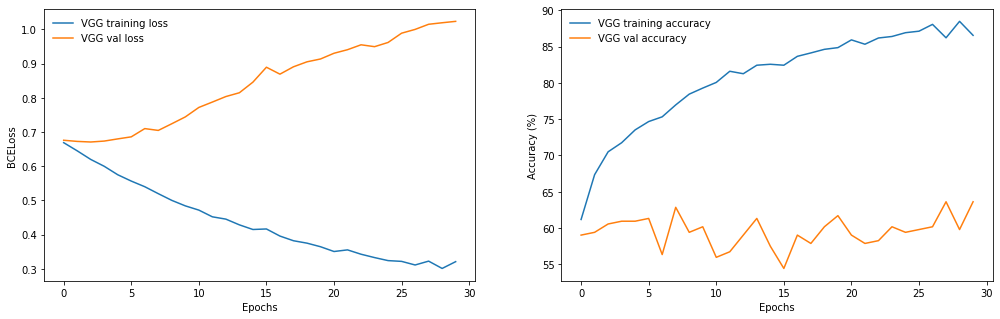

In [0]:
pb1 = Parse('0416_vgg_baseline_0.0002.txt', 'VGG')
pb1.plot_all()

In [0]:
idx = np.array(pb1.val_loss).argmin()
print(pb1.val_loss[idx], pb1.val_accuracy[idx])

0.6705083326361645 60.53639846743295


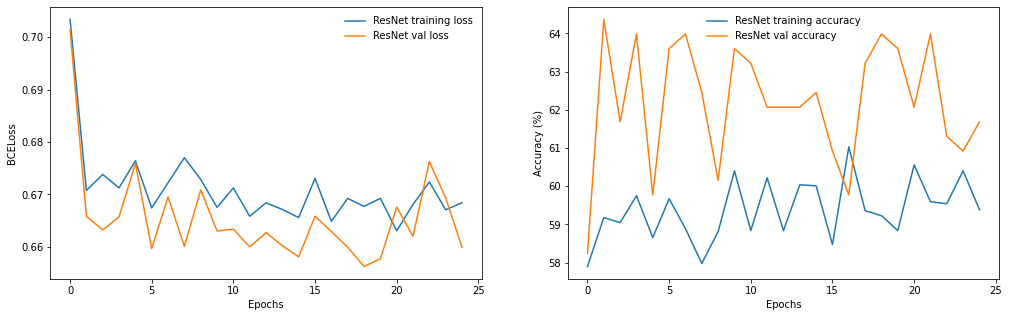

In [0]:
pb2 = Parse('0417_resnet_0.0002_baseline.txt', 'ResNet')
pb2.plot_all()

In [0]:
idx = np.array(pb2.val_loss).argmin()
print(pb2.val_loss[idx], pb2.val_accuracy[idx])

0.6562432859135771 63.984674329501914


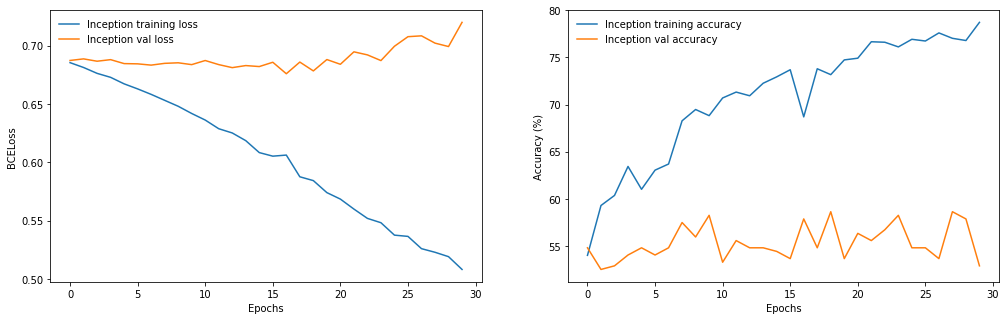

In [0]:
pb3 = Parse('0416_inception_baseline_0.0002.txt', 'Inception')
pb3.plot_all()

In [0]:
idx = np.array(pb3.val_loss).argmin()
print(pb3.val_loss[idx], pb3.val_accuracy[idx])

0.675876062948585 57.8544061302682


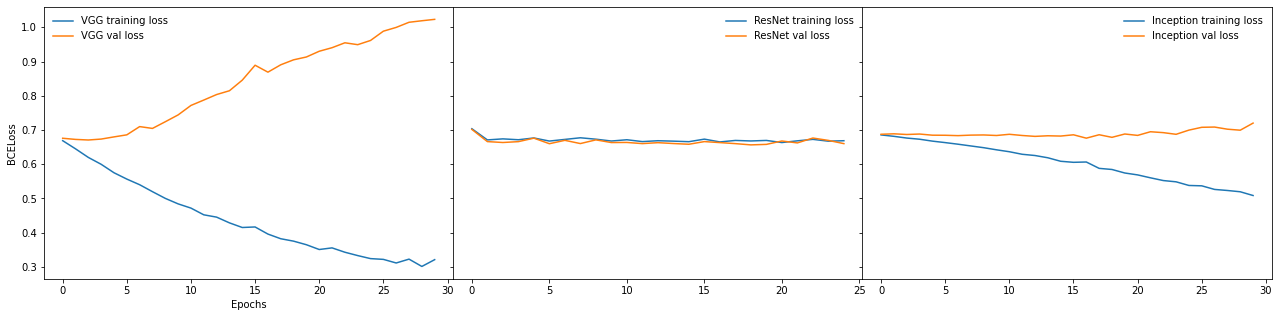

In [0]:
fig, ax = plt.subplots(1, 3, sharey=True, figsize=(22, 5), gridspec_kw={'hspace': 0, 'wspace': 0})
ax[0].plot(pb1.train_loss, label=pb1.model_name + ' training loss')
ax[0].plot(pb1.val_loss, label=pb1.model_name + ' val loss')
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("BCELoss")
ax[0].legend(frameon=False)

ax[1].plot(pb2.train_loss, label=pb2.model_name + ' training loss')
ax[1].plot(pb2.val_loss, label=pb2.model_name + ' val loss')
ax[1].legend(frameon=False)

ax[2].plot(pb3.train_loss, label=pb3.model_name + ' training loss')
ax[2].plot(pb3.val_loss, label=pb3.model_name + ' val loss')
ax[2].legend(frameon=False)

for a in ax.flat:
    a.label_outer()

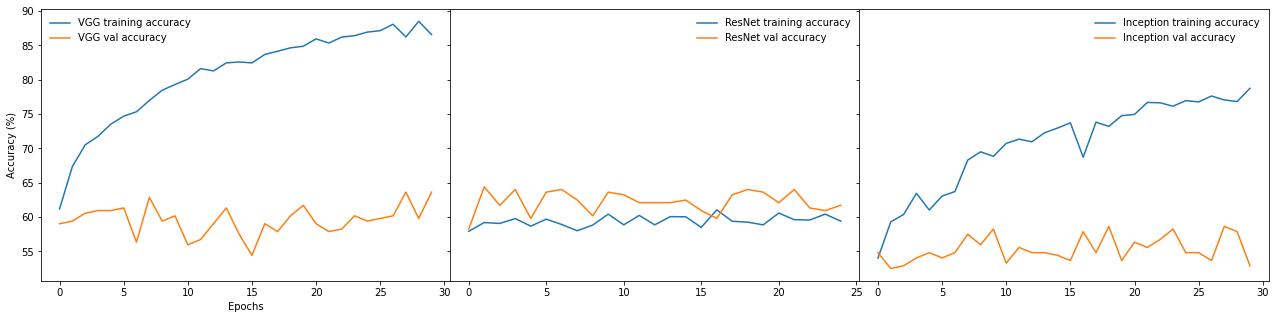

In [0]:
fig, ax = plt.subplots(1, 3, sharey=True, figsize=(22, 5), gridspec_kw={'hspace': 0, 'wspace': 0})
ax[0].plot(pb1.train_accuracy, label=pb1.model_name + ' training accuracy')
ax[0].plot(pb1.val_accuracy, label=pb1.model_name + ' val accuracy')
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy (%)")
ax[0].legend(frameon=False)

ax[1].plot(pb2.train_accuracy, label=pb2.model_name + ' training accuracy')
ax[1].plot(pb2.val_accuracy, label=pb2.model_name + ' val accuracy')
ax[1].legend(frameon=False)

ax[2].plot(pb3.train_accuracy, label=pb3.model_name + ' training accuracy')
ax[2].plot(pb3.val_accuracy, label=pb3.model_name + ' val accuracy')
ax[2].legend(frameon=False)

for a in ax.flat:
    a.label_outer()

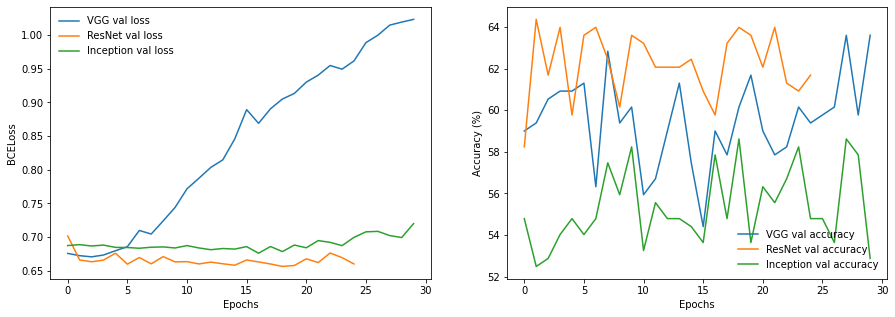

In [0]:
fig, ax = plt.subplots(1, 2, sharex=True, figsize=(15, 5))
ax[1].plot(pb1.val_accuracy, label=pb1.model_name + ' val accuracy')
ax[1].plot(pb2.val_accuracy, label=pb2.model_name + ' val accuracy')
ax[1].plot(pb3.val_accuracy, label=pb3.model_name + ' val accuracy')
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Accuracy (%)")
ax[1].legend(frameon=False)

ax[0].plot(pb1.val_loss, label=pb1.model_name + ' val loss')
ax[0].plot(pb2.val_loss, label=pb2.model_name + ' val loss')
ax[0].plot(pb3.val_loss, label=pb3.model_name + ' val loss')
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("BCELoss")
ax[0].legend(frameon=False)

### Finetune

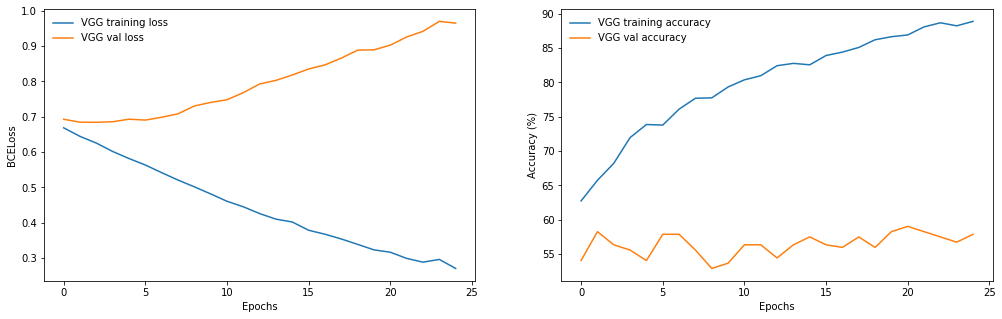

In [0]:
pf1 = Parse('0417_vgg_finetune_0.0001_1.txt.txt', 'VGG')
pf1.plot_all()

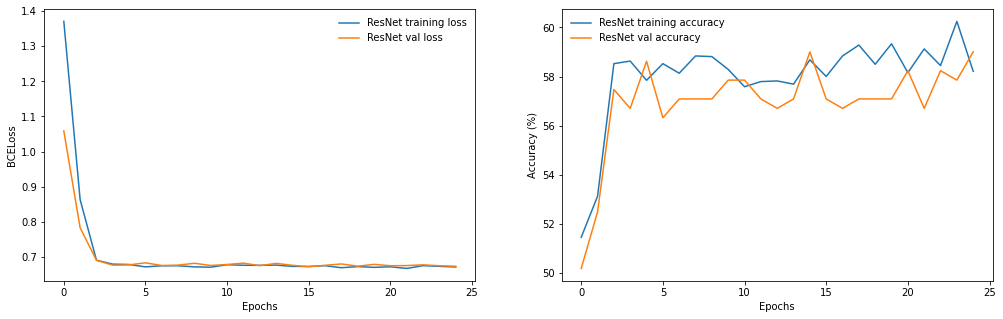

In [0]:
pf2 = Parse('0416_resnet_finetune.txt.txt', 'ResNet')
pf2.plot_all()

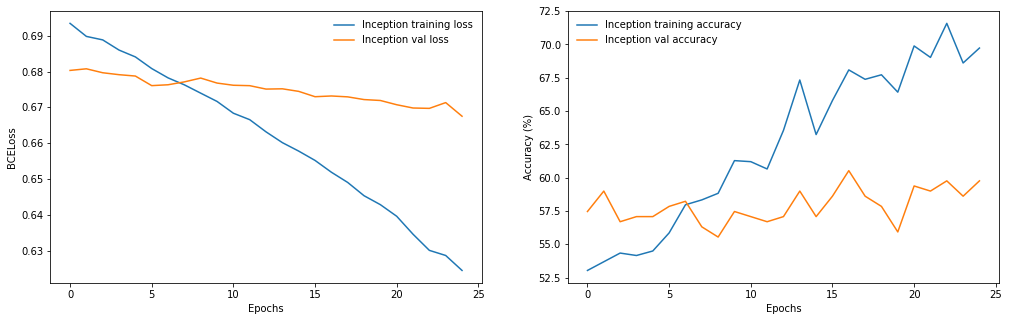

In [0]:
pf3 = Parse('0416_inception_ft_0.0001.txt.txt', 'Inception')
pf3.plot_all()

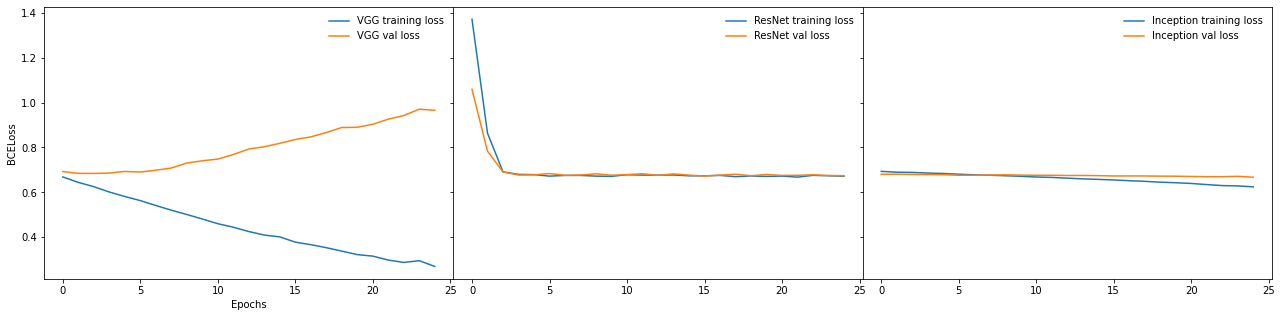

In [0]:
fig, ax = plt.subplots(1, 3, sharey=True, figsize=(22, 5), gridspec_kw={'hspace': 0, 'wspace': 0})
ax[0].plot(pf1.train_loss, label=pf1.model_name + ' training loss')
ax[0].plot(pf1.val_loss, label=pf1.model_name + ' val loss')
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("BCELoss")
ax[0].legend(frameon=False)

ax[1].plot(pf2.train_loss, label=pf2.model_name + ' training loss')
ax[1].plot(pf2.val_loss, label=pf2.model_name + ' val loss')
ax[1].legend(frameon=False)

ax[2].plot(pf3.train_loss, label=pf3.model_name + ' training loss')
ax[2].plot(pf3.val_loss, label=pf3.model_name + ' val loss')
ax[2].legend(frameon=False)

for a in ax.flat:
    a.label_outer()

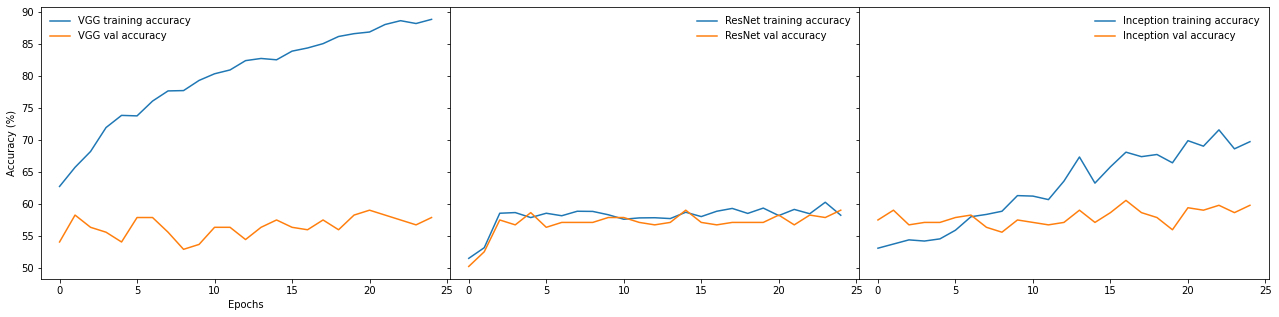

In [0]:
fig, ax = plt.subplots(1, 3, sharey=True, figsize=(22, 5), gridspec_kw={'hspace': 0, 'wspace': 0})
ax[0].plot(pf1.train_accuracy, label=pf1.model_name + ' training accuracy')
ax[0].plot(pf1.val_accuracy, label=pf1.model_name + ' val accuracy')
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy (%)")
ax[0].legend(frameon=False)

ax[1].plot(pf2.train_accuracy, label=pf2.model_name + ' training accuracy')
ax[1].plot(pf2.val_accuracy, label=pf2.model_name + ' val accuracy')
ax[1].legend(frameon=False)

ax[2].plot(pf3.train_accuracy, label=pf3.model_name + ' training accuracy')
ax[2].plot(pf3.val_accuracy, label=pf3.model_name + ' val accuracy')
ax[2].legend(frameon=False)

for a in ax.flat:
    a.label_outer()

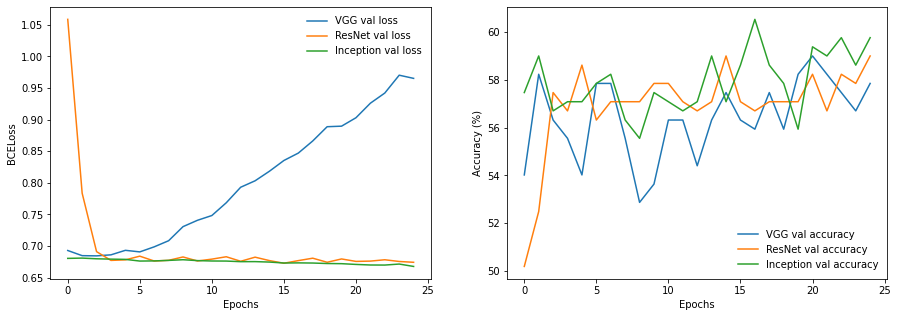

In [0]:
fig, ax = plt.subplots(1, 2, sharex=True, figsize=(15, 5))
ax[1].plot(pf1.val_accuracy, label=pf1.model_name + ' val accuracy')
ax[1].plot(pf2.val_accuracy, label=pf2.model_name + ' val accuracy')
ax[1].plot(pf3.val_accuracy, label=pf3.model_name + ' val accuracy')
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Accuracy (%)")
ax[1].legend(frameon=False)

ax[0].plot(pf1.val_loss, label=pf1.model_name + ' val loss')
ax[0].plot(pf2.val_loss, label=pf2.model_name + ' val loss')
ax[0].plot(pf3.val_loss, label=pf3.model_name + ' val loss')
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("BCELoss")
ax[0].legend(frameon=False)

VGG with less layers frozen

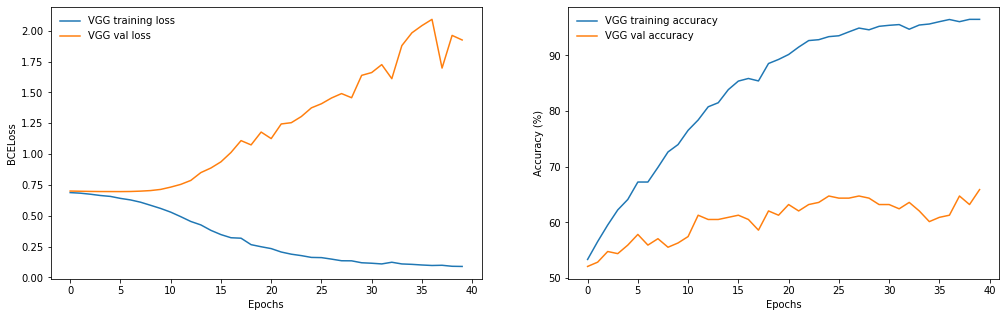

In [0]:
pf4 = Parse('0417_vgg_scratch_0.0001.txt.txt', 'VGG')
pf4.plot_all()